<a href="https://colab.research.google.com/github/josueisaihs/PytorchTutorial/blob/main/baterySoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


urls = {
    "40degC": [
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge1.csv", #0
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge2.csv", #1
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge3.csv", #2
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge4.csv", #3
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge5.csv", #4
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge6.csv", #5
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge7.csv", #6
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Charge8.csv", #7
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Mixed1.csv",  #8
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/556_Mixed2.csv",  #9
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/557_Charge10.csv",#10
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/557_Charge9.csv", #11
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/557_Mixed3.csv",  #12
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge10.csv",#13
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge11.csv", #14
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge12.csv", #15
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge13.csv", #16
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge14.csv", #17
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge15.csv", #18
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Charge16.csv", #19
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Mixed4.csv", #20
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Mixed5.csv",#21
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Mixed6.csv",#22
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Mixed7.csv",#23
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/40degC/562_Mixed8.csv",#24
    ],
    "25degC": [
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/549_C20DisCh.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Cap_1C.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/549_Charge.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge1.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge2.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge3.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge4.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge5.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge6.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge7.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Charge8.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Mixed1.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/551_Mixed2.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge10.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge11.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge12.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge13.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge14.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge15.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge16.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Charge9.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed3.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed4.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed5.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed6.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed7.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/25degC/552_Mixed8.csv",
    ],
    "10degC": [
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/567_Charge6.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/567_Charge7.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/567_Charge8.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/567_Mixed1.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/567_Mixed2.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge10.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge11.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge12.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge13.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge14.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge15.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Charge16.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Mixed4.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Mixed5.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Mixed6.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Mixed7.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/571_Mixed8.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/576_Charge1.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/576_Charge2.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/576_Charge3.csv",
        "https://github.com/josueisaihs/PytorchTutorial/raw/main/10degC/576_Charge4.csv",
    ]
}
data_dch = pd.DataFrame()
data_cha = pd.DataFrame()
data_plot = []
for degree in urls.keys():
  for url in urls[degree]:
    data_ = pd.read_csv(url, skiprows=29)
    try:
      data_.columns = ["TimeStamp", "Step", "Status", "ProgTime", "StepTime", "Cycle", "CycleLevel", "Procedure", "Voltage", "Current", "Temperature", "Capacity", "WhAccu", "Cnt", "-"]
      data_ = data_.drop(columns=["TimeStamp", "Step", "StepTime", "ProgTime", "Cycle", "CycleLevel", "-"])
    except:
      data_.columns = ["TimeStamp", "Step", "Status", "ProgTime", "StepTime", "Cycle", "CycleLevel", "Procedure", "Voltage", "Current", "Temperature", "Capacity", "WhAccu", "Cnt"]

    data_dch_ = data_[(data_["Status"] == "TABLE") | (data_["Status"] == "DCH")]
    data_cha_ = data_[(data_["Status"] == "CHA") | (data_["Status"] == "CHA")]

    try:
      max_discharge = abs(min(data_dch_["Capacity"]))
      soc_cap = max_discharge + data_dch_["Capacity"]
      soc_cap_pc = soc_cap / max(soc_cap)

      data_plot.append({'status': 'DCH', 'voltage': data_dch_["Voltage"], 'soc': soc_cap_pc, 'current': data_dch_["Current"], 'temperature': data_dch_["Temperature"], 'capacity': soc_cap, 'name': degree + "-" + url.replace(f'https://github.com/josueisaihs/PytorchTutorial/raw/main/{degree}/', '').replace('.csv', '')})

      data_dch_.insert(data_dch_.columns.get_loc("Cnt"), "SoC_Percentage", soc_cap_pc)
      data_dch_.insert(data_dch_.columns.get_loc("SoC_Percentage"), "SoC_Capacity", soc_cap)

      data_dch = pd.concat(objs=[data_dch, data_dch_], sort=False, ignore_index=True)

      print(f"Cargando: {url.replace(f'https://github.com/josueisaihs/PytorchTutorial/raw/main/{degree}/', '').replace('.csv', '')}\t -> OK")
    except ValueError as e:
      try:
        max_discharge = abs(min(data_cha_["Capacity"]))
        soc_cap = max_discharge + data_cha_["Capacity"]
        soc_cap_pc = soc_cap / max(soc_cap)

        data_plot.append({'status': 'CHA', 'voltage': data_cha_["Voltage"], 'soc': soc_cap_pc, 'current': data_cha_["Current"], 'temperature': data_cha_["Temperature"], 'capacity': soc_cap, 'name': degree + "-" + url.replace(f'https://github.com/josueisaihs/PytorchTutorial/raw/main/{degree}/', '').replace('.csv', '')})

        data_cha_.insert(data_cha_.columns.get_loc("Cnt"), "SoC_Percentage", soc_cap_pc)
        data_cha_.insert(data_cha_.columns.get_loc("SoC_Percentage"), "SoC_Capacity", soc_cap)

        data_cha = pd.concat(objs=[data_cha, data_cha_], sort=False, ignore_index=True)

        print(f"Cargando: {url.replace(f'https://github.com/josueisaihs/PytorchTutorial/raw/main/{degree}/', '').replace('.csv', '')}\t -> OK")
      except:
        print(f"Cargando: {url.replace(f'https://github.com/josueisaihs/PytorchTutorial/raw/main/{degree}/', '').replace('.csv', '')}\t-> ERROR")

data_dch.describe()

Cargando: 556_Charge1	 -> OK
Cargando: 556_Charge2	 -> OK
Cargando: 556_Charge3	 -> OK
Cargando: 556_Charge4	 -> OK
Cargando: 556_Charge5	 -> OK
Cargando: 556_Charge6	 -> OK
Cargando: 556_Charge7	 -> OK
Cargando: 556_Charge8	 -> OK
Cargando: 556_Mixed1	 -> OK
Cargando: 556_Mixed2	 -> OK
Cargando: 557_Charge10	-> ERROR
Cargando: 557_Charge9	 -> OK
Cargando: 557_Mixed3	 -> OK
Cargando: 562_Charge10	 -> OK
Cargando: 562_Charge11	 -> OK
Cargando: 562_Charge12	 -> OK
Cargando: 562_Charge13	 -> OK
Cargando: 562_Charge14	 -> OK
Cargando: 562_Charge15	 -> OK
Cargando: 562_Charge16	 -> OK
Cargando: 562_Mixed4	 -> OK
Cargando: 562_Mixed5	 -> OK
Cargando: 562_Mixed6	 -> OK
Cargando: 562_Mixed7	 -> OK
Cargando: 562_Mixed8	 -> OK
Cargando: 549_C20DisCh	 -> OK
Cargando: 551_Cap_1C	 -> OK
Cargando: 549_Charge	 -> OK
Cargando: 551_Charge1	 -> OK
Cargando: 551_Charge2	 -> OK
Cargando: 551_Charge3	 -> OK
Cargando: 551_Charge4	 -> OK
Cargando: 551_Charge5	 -> OK
Cargando: 551_Charge6	 -> OK
Cargando: 551

,Voltage,Current,Temperature,Capacity,WhAccu,SoC_Capacity,SoC_Percentage,Cnt
count,1.280100e+06,1.280100e+06,1.280100e+06,1.280100e+06,1.280100e+06,1.280100e+06,1.280100e+06,1.280100e+06
mean,3.745902e+00,-1.286060e+00,2.119280e+01,-1.136134e+00,-4.238257e+00,1.300714e+00,5.322737e-01,5.274890e+00
std,2.564308e-01,2.586432e+00,1.011272e+01,7.125882e-01,2.571195e+00,7.221874e-01,2.829496e-01,2.123488e+00
min,2.796050e+00,-1.809828e+01,8.833320e+00,-2.780740e+00,-1.030280e+01,0.000000e+00,0.000000e+00,2.000000e+00
25%,3.568390e+00,-2.520890e+00,9.779740e+00,-1.674580e+00,-6.213732e+00,7.338975e-01,3.131404e-01,3.000000e+00
50%,3.755150e+00,-9.501200e-01,2.397615e+01,-1.175740e+00,-4.483515e+00,1.274090e+00,5.220232e-01,6.000000e+00
75%,3.960460e+00,-9.450000e-02,2.450194e+01,-4.991100e-01,-1.939348e+00,1.921870e+00,7.764582e-01,7.000000e+00
max,4.239900e+00,6.004720e+00,4.017056e+01,1.950000e-03,8.190000e-03,2.778200e+00,1.000000e+00,1.300000e+01


<Figure size 3000x3000 with 0 Axes>

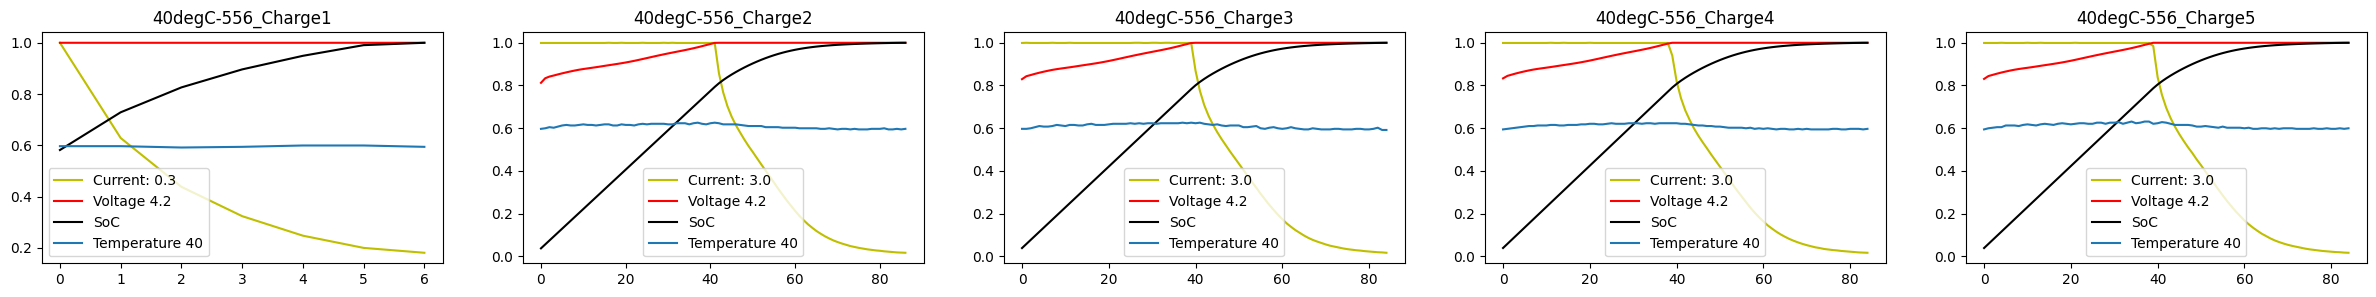

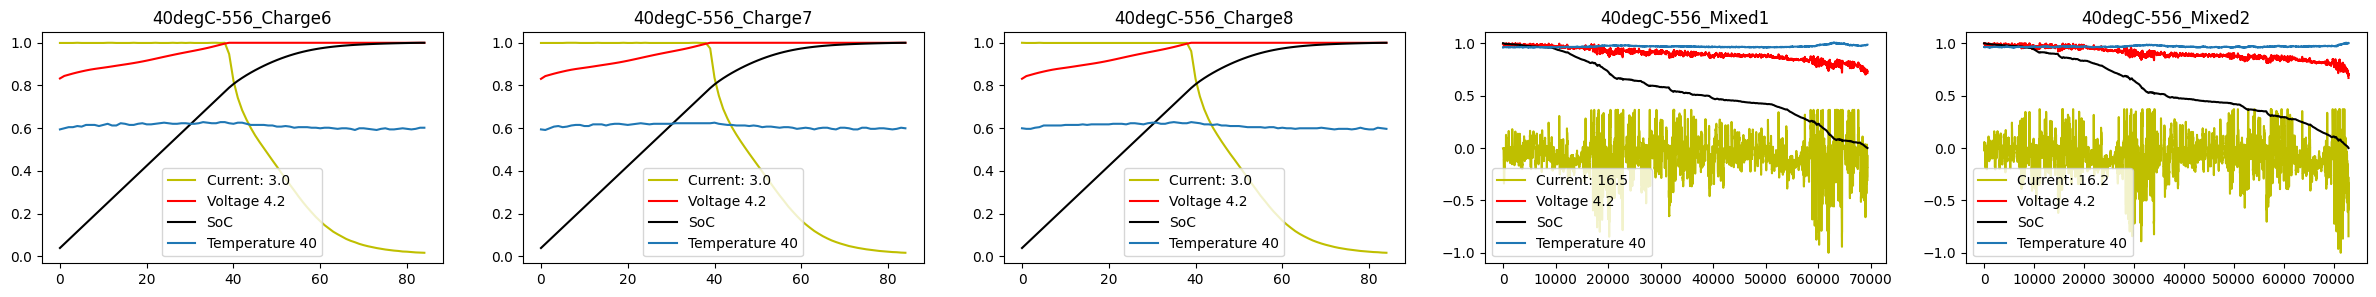

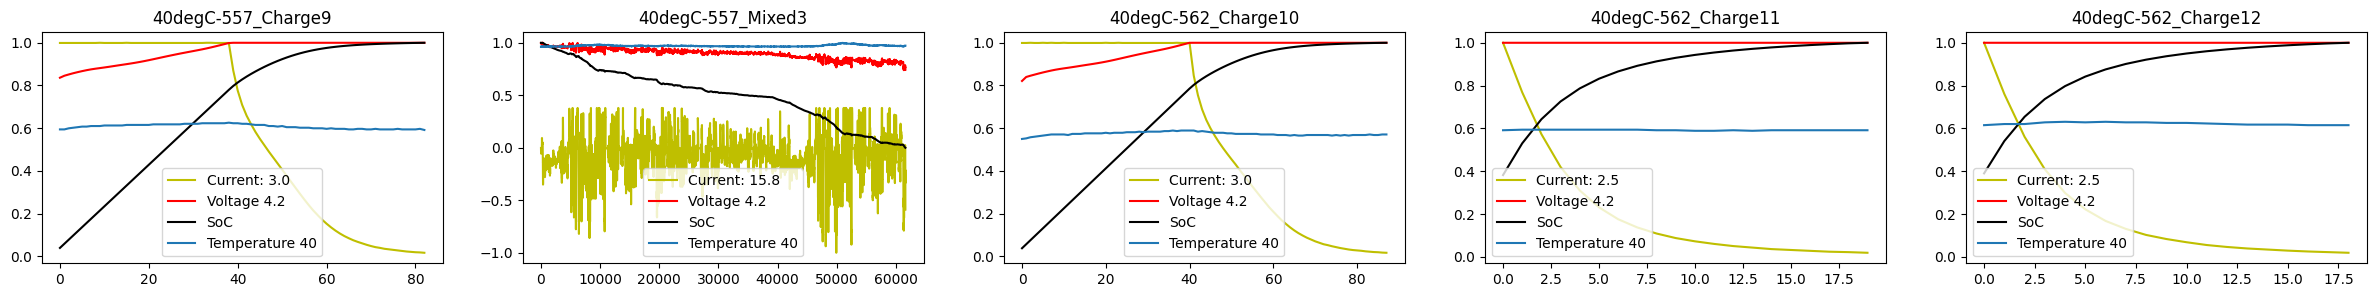

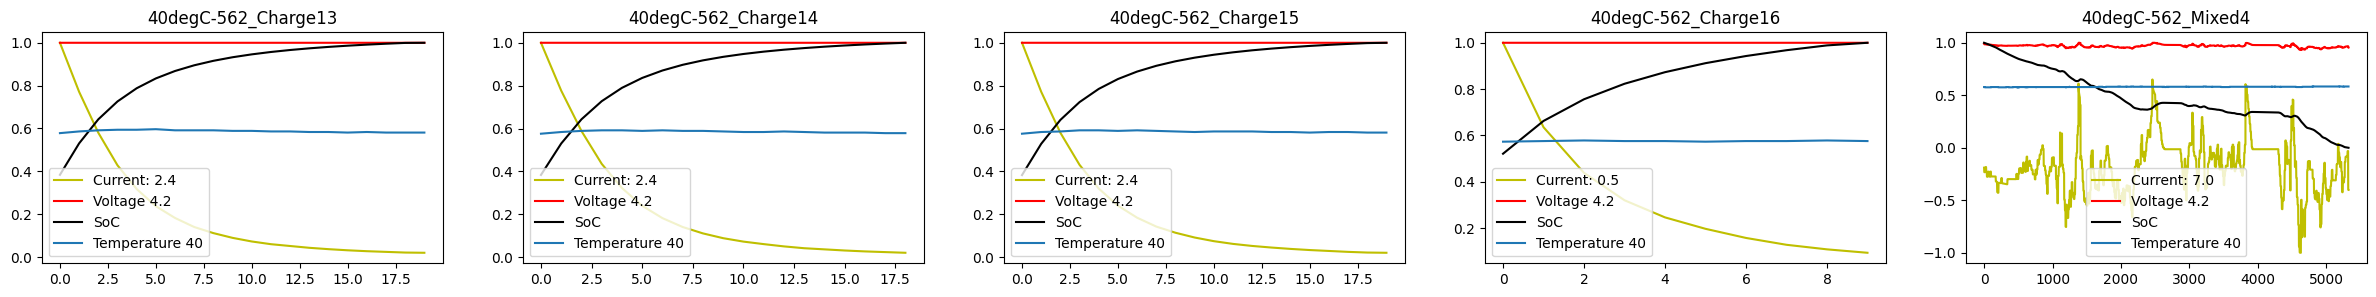

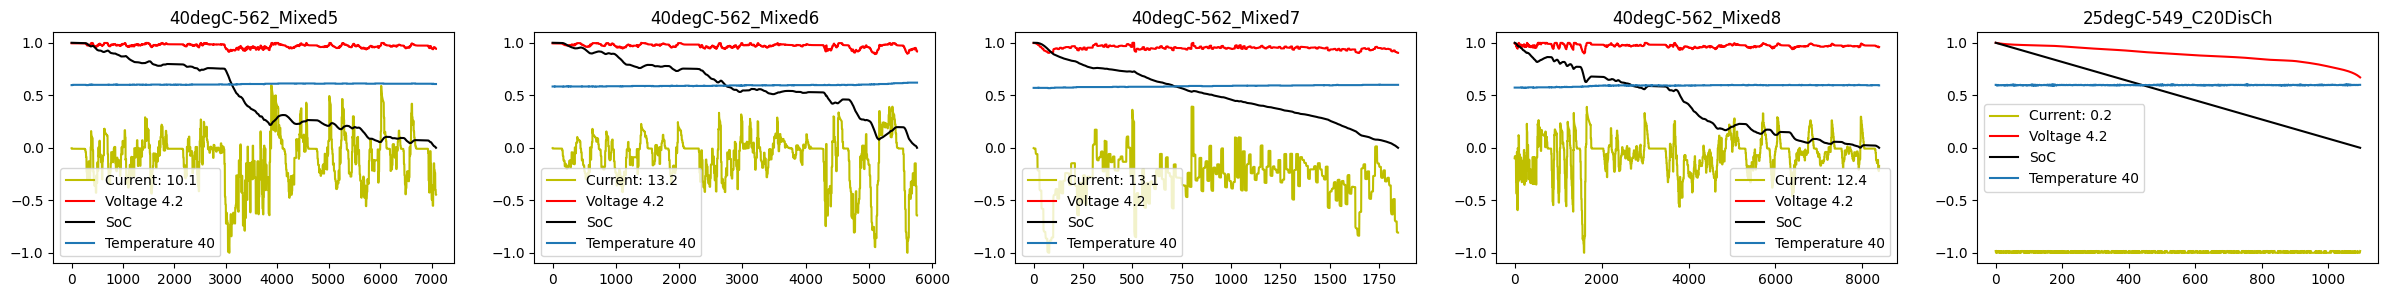

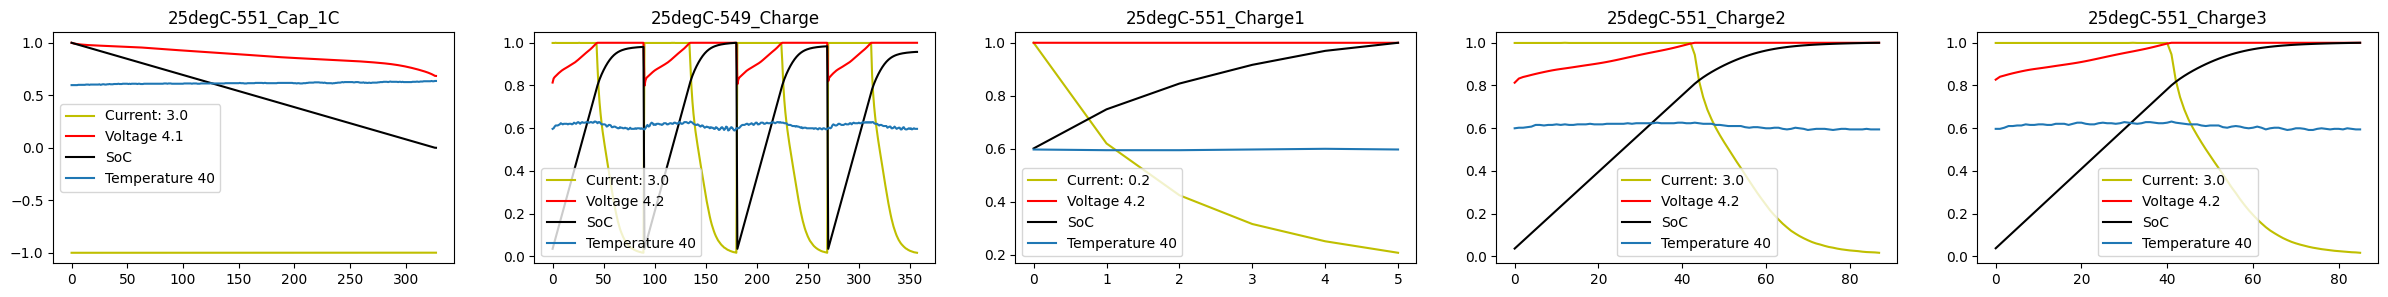

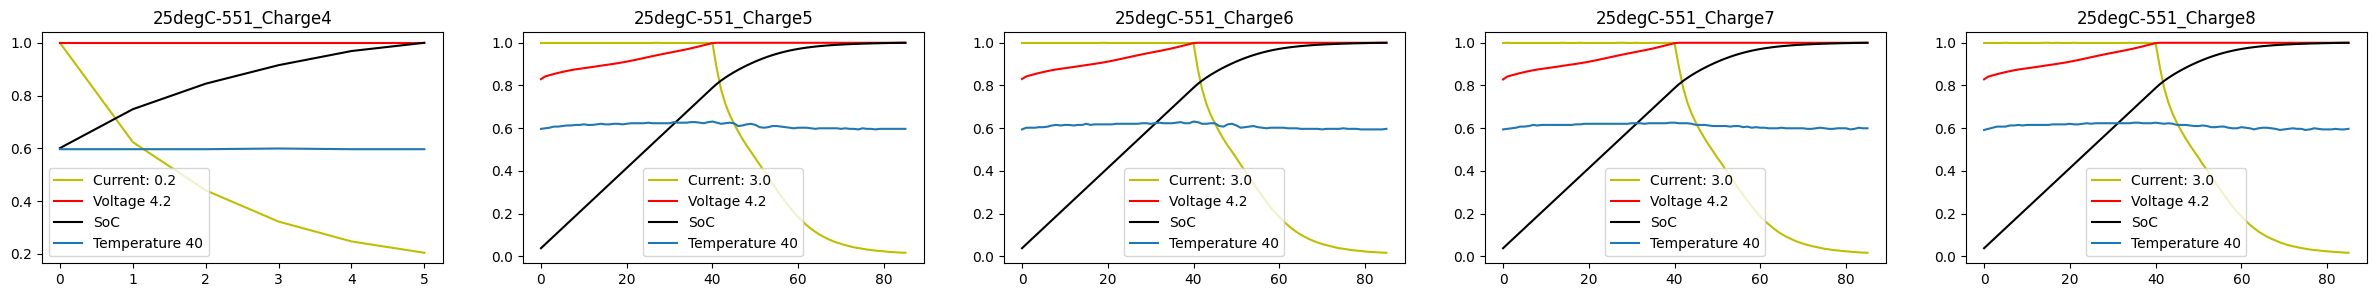

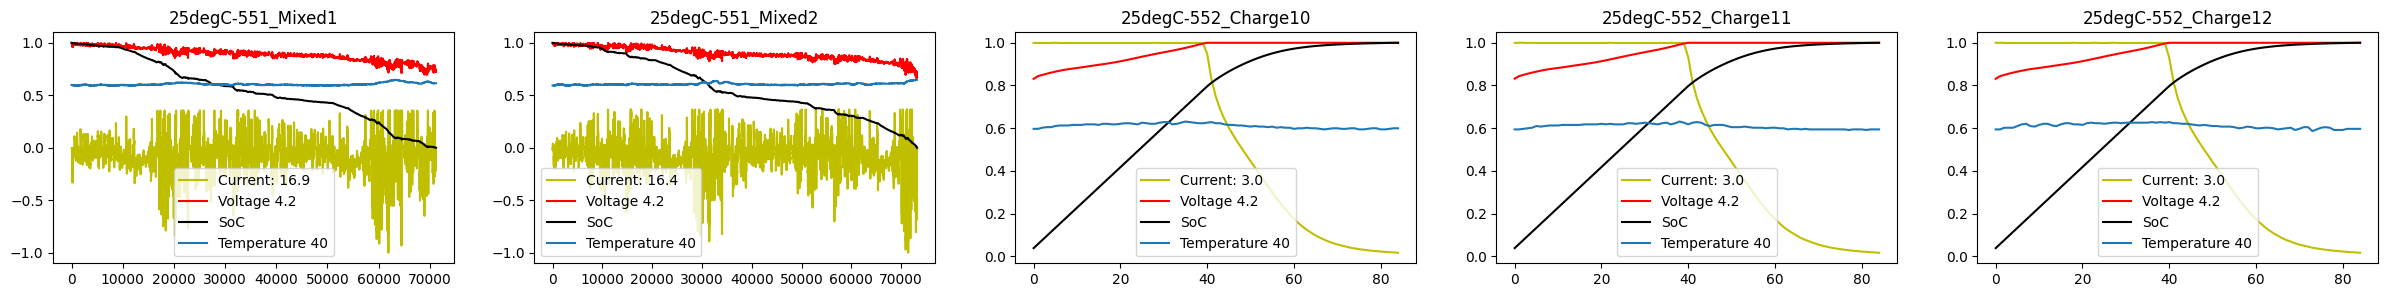

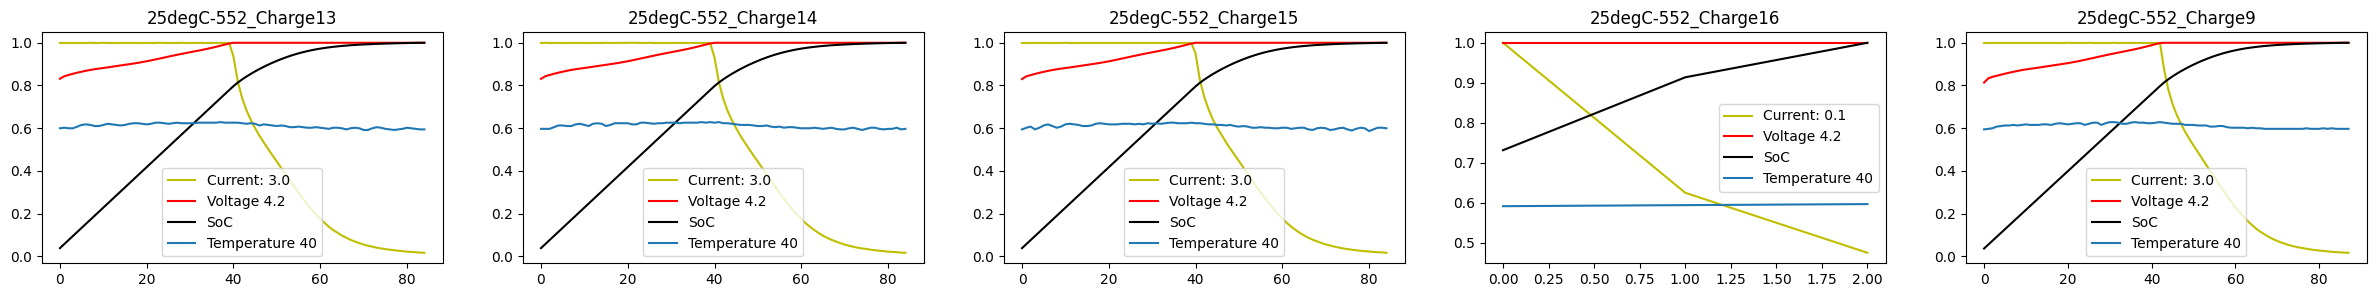

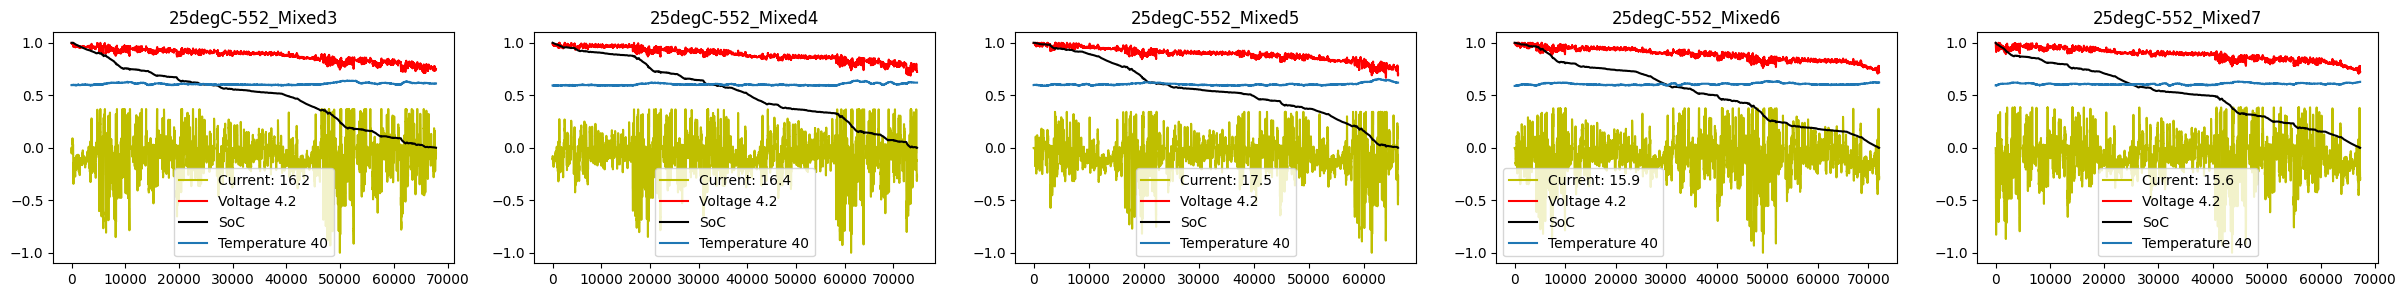

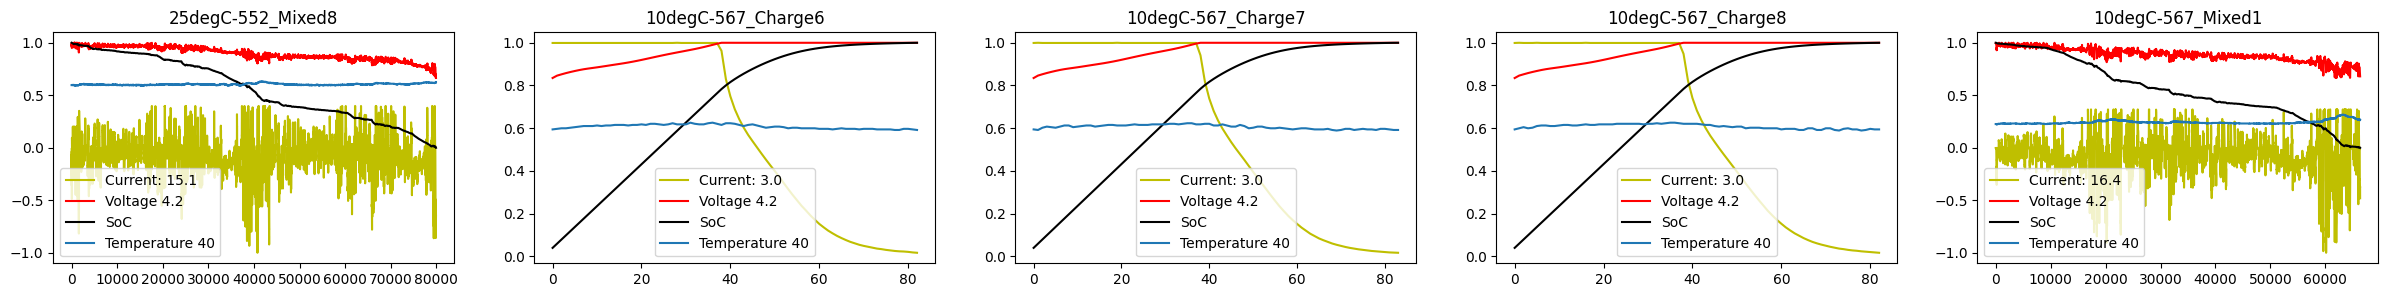

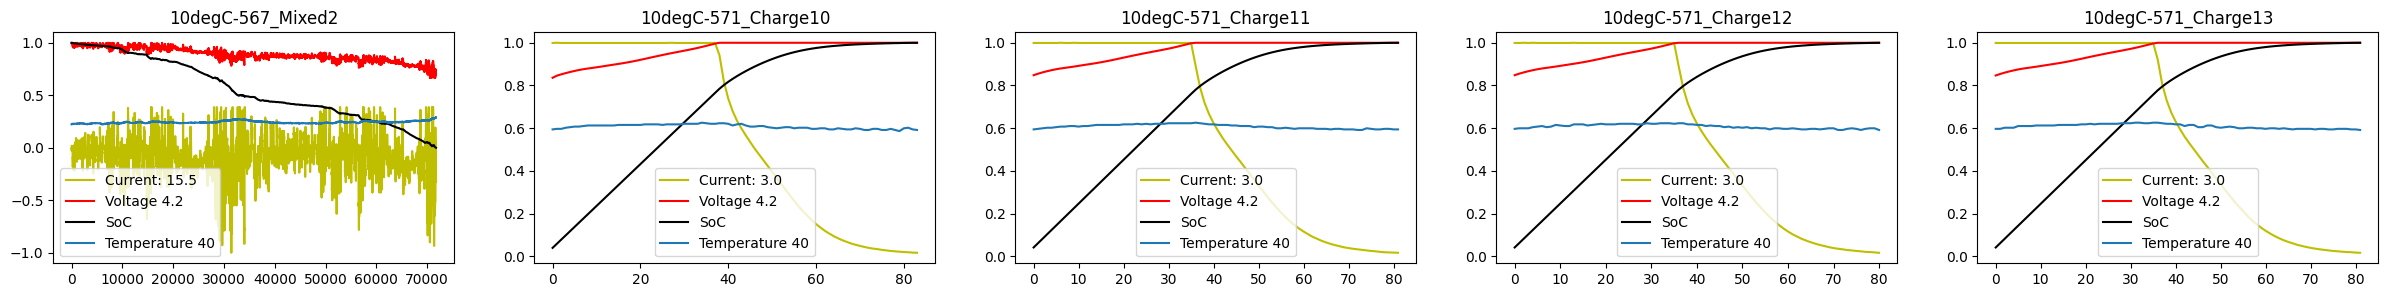

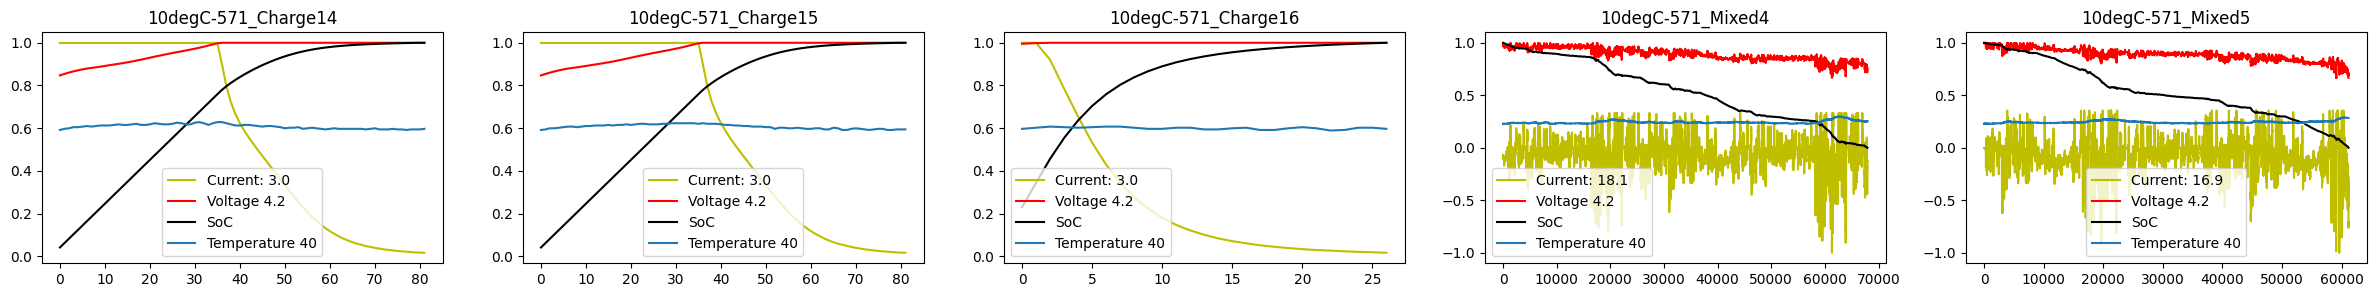

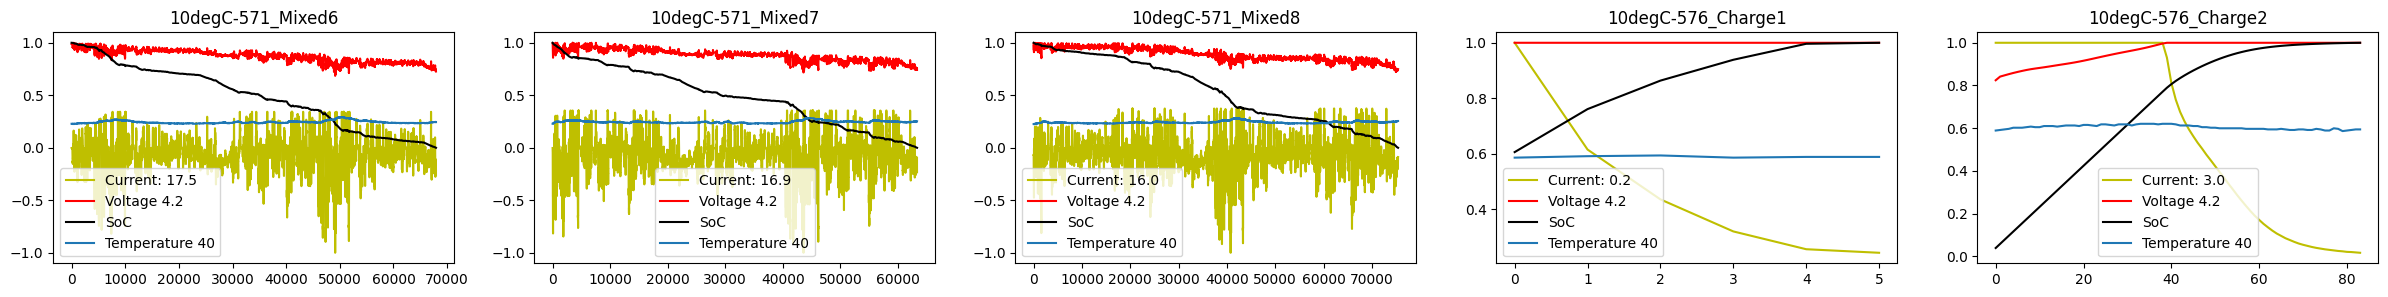

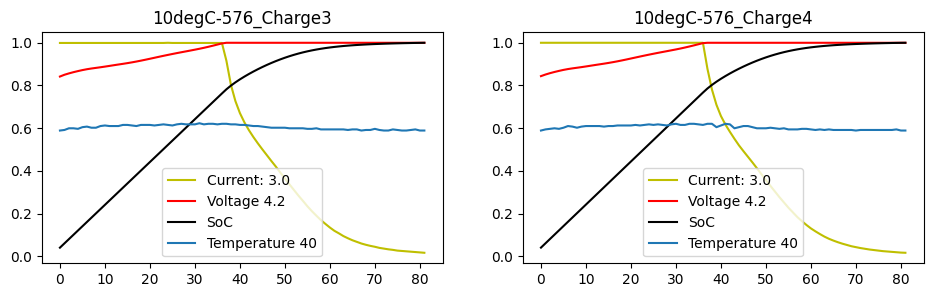

In [55]:
T_s = 1.011272e+01
T_u = 2.119280e+01

I_s = 2.586432e+00
I_u = -1.286060e+00

U_s = 2.564308e-01
U_u = 3.745902e+00

plt.figure(figsize=(30, 30))
plt.suptitle('Voltage/Current/SoC')
subplot = (151, 152, 153, 154, 155)
j = 0
for i in range(len(data_plot)):
  if i % 5 == 0:
    plt.figure(figsize=(30, 3))
    j = 0
  plt.subplot(subplot[j])
  j += 1
  x = range(len(data_plot[i]['voltage']))
  max_current = max(abs(data_plot[i]['current']))
  max_voltage = max(data_plot[i]['voltage'])
  max_temperature = 40
  plt.title(data_plot[i]['name'])
  plt.plot(x, data_plot[i]['current'] / max_current, 'y', x, data_plot[i]['voltage'] / max_voltage, 'r', x, data_plot[i]['soc'], 'k', x, data_plot[i]['temperature'] / max_temperature)
  # plt.plot(x, (data_plot[i]['current'] - I_u) / I_s, 'y', x, (data_plot[i]['voltage'] - U_u) / U_s, 'r', x, data_plot[i]['soc'], 'k', x, (data_plot[i]['temperature'] - T_u) / T_s)
  plt.legend([f"Current: {round(max_current, 1)}", f"Voltage {round(max_voltage, 1)}", "SoC", f'Temperature {round(max_temperature, 1)}'])

## Modelo de la red

Ojo: con relu a la salida no tiene buenos resultados. El Selu permite obtener valores negativos y mejora la disicion de la red

In [56]:
class Model(nn.Module):
  def __init__(self, n_input=1, n_hidden_1=1, n_hidden_2=1, n_hidden_3=3, n_output=1):
    super().__init__()

    self.fc_inp = nn.Linear(n_input, n_hidden_1)
    self.fc_hdd = nn.Linear(n_hidden_1, n_hidden_2)
    self.fc_hd2 = nn.Linear(n_hidden_2, n_hidden_3)
    self.fc_out = nn.Linear(n_hidden_3, n_output)

  def forward(self, x):
    x = F.selu(self.fc_inp(x))
    x = F.sigmoid(self.fc_hdd(x))
    x = F.sigmoid(self.fc_hd2(x))
    return F.selu(self.fc_out(x))

  def evaluate(self, x):
    return self.forward(x).argmax().item()

Funcion de discretizacion del SoC de la bateria

In [57]:
qty_outputs = 5
def discretize_soc(percentage):
    if percentage <= 0.2:
        return 0.
    elif percentage <= 0.4:
        return 1.
    elif percentage <= 0.6:
        return 2.
    elif percentage <= 0.8:
        return 3.
    else:
        return 4.

# Entrenamiento de determinar el SoC en Descarga de la batería

In [ ]:
data_dch_y_real = data_dch["SoC_Percentage"]

data_dch_y = data_dch["SoC_Percentage"].apply(discretize_soc)
data_dch_x = data_dch[["Voltage", "Current", "Temperature"]]

In [ ]:
scaler = StandardScaler()
data_dch_x = scaler.fit_transform(data_dch_x)

# data_dch_x = data_dch_x.values
data_dch_y = data_dch_y.values
print(data_dch_y)

[4. 4. 4. ... 0. 0. 0.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_dch_x, data_dch_y, test_size=.2, random_state=51)
print(f'X Train: {x_train.shape[0]}\tX Test: {x_test.shape[0]}\tY Train: {y_train.shape[0]}\tY Test: {y_test.shape[0]}')

X Train: 1024080	X Test: 256020	Y Train: 1024080	Y Test: 256020


In [ ]:
n_inputs = x_train.shape[1]
n_outputs = qty_outputs

In [ ]:
t_x_train = torch.FloatTensor(x_train)
t_x_test = torch.FloatTensor(x_test)
t_y_train = torch.LongTensor(y_train)
t_y_test = torch.LongTensor(y_test)

In [ ]:
test = TensorDataset(t_x_test, t_y_test)
print(test[0])

(tensor([-0.7435, -1.2171, -1.0142]), tensor(2))


In [ ]:
%%time

learning_rate = 1e-3
epochs = 2000
status_print = 100

model = Model(n_inputs, 40, 80, 40, n_outputs)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = learning_rate)
history = pd.DataFrame()

print("Training ...")
for epoch in range(epochs):
  y_pred = model.forward(t_x_train)
  loss = criterion(y_pred, t_y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % status_print == 0: print(f"Epoch {epoch}\tLoss {loss}")

  df_tmp = pd.DataFrame(data={
      "Epoch": epoch,
      "Loss": loss.detach().numpy()
  }, index=[0])
  history = pd.concat(objs=[history, df_tmp], ignore_index=True, sort=False)
print(f"{loss.detach().numpy()}\n\n-- End --")

Training ...
Epoch 0	Loss 1.65384042263031
Epoch 100	Loss 0.9755980372428894
Epoch 200	Loss 0.628523588180542
Epoch 300	Loss 0.4555458724498749
Epoch 400	Loss 0.3726195693016052
Epoch 500	Loss 0.3348177373409271
Epoch 600	Loss 0.31514230370521545
Epoch 700	Loss 0.3035956621170044
Epoch 800	Loss 0.29630061984062195
Epoch 900	Loss 0.29134127497673035
Epoch 1000	Loss 0.28764697909355164
Epoch 1100	Loss 0.28491395711898804
Epoch 1200	Loss 0.28265735507011414
Epoch 1300	Loss 0.2807002663612366
Epoch 1400	Loss 0.27897027134895325
Epoch 1500	Loss 0.2774462103843689
Epoch 1600	Loss 0.27607762813568115
Epoch 1700	Loss 0.2748153805732727
Epoch 1800	Loss 0.2736256420612335
Epoch 1900	Loss 0.27250200510025024
0.27145105600357056

-- End --
CPU times: user 1h 4min, sys: 42min 18s, total: 1h 46min 18s
Wall time: 1h 46min 37s


In [ ]:
with torch.no_grad():
    y_eval = model.forward(t_x_test)
    loss = criterion(y_eval, t_y_test)
loss

correct = 0
with torch.no_grad():
  for i, data in enumerate(t_x_test):
    y_val = model.forward(data)

    if y_val.argmax().item() == t_y_test[i]:
      correct += 1
      print(f'{str(y_val)}\t{y_val.argmax().item()}-{t_y_test[i]}')
    else:
      print(f'{str(y_val)}\t{y_val.argmax().item()}-{t_y_test[i]}\tEE')

print(f'Correct {correct}/{len(t_x_test)} {round(100*correct/len(t_x_test), 2)}%')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
tensor([ 8.9198,  3.9302, -1.2195, -1.7285, -1.7472])	0-0
tensor([-1.7575, -1.4821, -1.5940, -0.9661,  2.4794])	4-4
tensor([-1.7496, -1.2769,  3.7805,  4.5748, -1.3635])	3-2	EE
tensor([ 8.1351,  4.2279, -1.0808, -1.7271, -1.7465])	0-0
tensor([-1.7575, -1.4829, -1.5911, -0.9183,  2.4634])	4-4
tensor([-1.7103,  1.3241,  6.2324,  0.3565, -1.6269])	2-2
tensor([-1.7277,  0.5008,  6.6406,  1.0551, -1.5942])	2-2
tensor([ 7.9754,  4.2903, -1.0499, -1.7269, -1.7464])	0-0
tensor([-1.7575, -1.4851, -1.5819, -0.7567,  2.4173])	4-4
tensor([-0.5693,  5.9626,  2.3911, -1.6681, -1.7320])	1-1
tensor([-1.6062,  3.2577,  4.8896, -1.1891, -1.6806])	2-2
tensor([ 7.8735,  4.3296, -1.0288, -1.7267, -1.7463])	0-0
tensor([-1.7424, -0.8468,  5.8142,  2.7193, -1.5224])	2-2
tensor([ 8.7436,  3.9950, -1.1903, -1.7281, -1.7470])	0-0
tensor([-1.7575, -1.4820, -1.5949, -0.9792,  2.4843])	4-4
tensor([-1.7355, -0.1803,  6.7774,  1.6244, -1.5660])	2-2
te

Text(0.5, 0.98, 'SoC DCH')

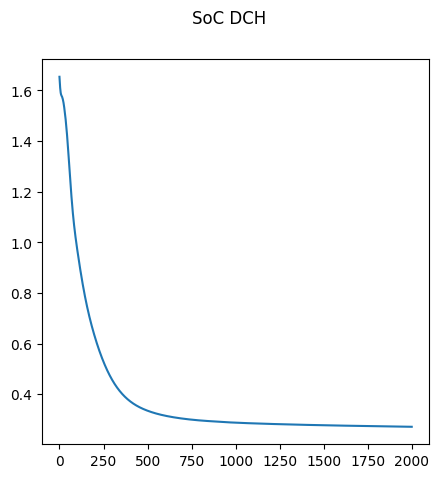

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history["Epoch"], history["Loss"], label='Loss')
plt.suptitle('SoC DCH')

In [ ]:
# Save in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Save model
path = F'/content/gdrive/MyDrive/Colab Notebooks/model_dch_40deg_40_80_40_93pc.pt'
torch.save(model.state_dict(), path)

# Entrenamiento de determinar el SoC en Carga de la batería

In [59]:
data_cha_y_real = data_cha["SoC_Percentage"]

data_cha_y = data_cha["SoC_Percentage"].apply(discretize_soc)
data_cha_x = data_cha[["Voltage", "Current", "Temperature"]]

In [60]:
scaler = StandardScaler()
data_cha_x = scaler.fit_transform(data_cha_x)

# data_dch_x = data_dch_x.values
data_cha_y = data_cha_y.values
print(data_cha_y)

[2. 3. 4. ... 4. 4. 4.]


In [61]:
x_train, x_test, y_train, y_test = train_test_split(data_cha_x, data_cha_y, test_size=.2, random_state=51)
print(f'X Train: {x_train.shape[0]}\tX Test: {x_test.shape[0]}\tY Train: {y_train.shape[0]}\tY Test: {y_test.shape[0]}')

X Train: 2716	X Test: 680	Y Train: 2716	Y Test: 680


In [62]:
n_inputs = x_train.shape[1]
n_outputs = qty_outputs

In [63]:
t_x_train = torch.FloatTensor(x_train)
t_x_test = torch.FloatTensor(x_test)
t_y_train = torch.LongTensor(y_train)
t_y_test = torch.LongTensor(y_test)

In [64]:
test = TensorDataset(t_x_test, t_y_test)
print(test[0])

(tensor([ 0.7248, -0.4378,  0.3927]), tensor(4))


In [65]:
%%time

learning_rate = 1e-3
epochs = 4000
status_print = 100

model = Model(n_inputs, 25, 30, 25, n_outputs)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = learning_rate)
history = pd.DataFrame()

print("Training ...")
for epoch in range(epochs):
  y_pred = model.forward(t_x_train)
  loss = criterion(y_pred, t_y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % status_print == 0: print(f"Epoch {epoch}\tLoss {loss}")

  df_tmp = pd.DataFrame(data={
      "Epoch": epoch,
      "Loss": loss.detach().numpy()
  }, index=[0])
  history = pd.concat(objs=[history, df_tmp], ignore_index=True, sort=False)
print(f"{loss.detach().numpy()}\n\n-- End --")

Training ...
Epoch 0	Loss 1.7675063610076904
Epoch 100	Loss 1.15297269821167
Epoch 200	Loss 0.8112607598304749
Epoch 300	Loss 0.6536564826965332
Epoch 400	Loss 0.5328609347343445
Epoch 500	Loss 0.44060608744621277
Epoch 600	Loss 0.3721972703933716
Epoch 700	Loss 0.3222475051879883
Epoch 800	Loss 0.284290075302124
Epoch 900	Loss 0.25075873732566833
Epoch 1000	Loss 0.22039884328842163
Epoch 1100	Loss 0.19423292577266693
Epoch 1200	Loss 0.17250582575798035
Epoch 1300	Loss 0.15719039738178253
Epoch 1400	Loss 0.14689546823501587
Epoch 1500	Loss 0.13930587470531464
Epoch 1600	Loss 0.13329026103019714
Epoch 1700	Loss 0.12809209525585175
Epoch 1800	Loss 0.12304811179637909
Epoch 1900	Loss 0.11963921040296555
Epoch 2000	Loss 0.11684931069612503
Epoch 2100	Loss 0.11431889235973358
Epoch 2200	Loss 0.11196893453598022
Epoch 2300	Loss 0.10974304378032684
Epoch 2400	Loss 0.10796292126178741
Epoch 2500	Loss 0.10643717646598816
Epoch 2600	Loss 0.10498806089162827
Epoch 2700	Loss 0.10353263467550278
Ep

In [66]:
with torch.no_grad():
    y_eval = model.forward(t_x_test)
    loss = criterion(y_eval, t_y_test)
loss

correct = 0
with torch.no_grad():
  for i, data in enumerate(t_x_test):
    y_val = model.forward(data)

    if y_val.argmax().item() == t_y_test[i]:
      correct += 1
      print(f'{str(y_val)}\t{y_val.argmax().item()}-{t_y_test[i]}')
    else:
      print(f'{str(y_val)}\t{y_val.argmax().item()}-{t_y_test[i]}\tEE')

print(f'Correct {correct}/{len(t_x_test)} {round(100*correct/len(t_x_test), 2)}%')

tensor([-1.6666, -1.1927, -1.7184,  0.6300,  6.4068])	4-4
tensor([-1.7553,  4.1904, 10.3371,  2.7372, -1.3655])	2-2
tensor([-1.2887,  6.7853,  3.6089, -1.0831, -1.4808])	1-1
tensor([-1.6674, -1.1911, -1.7182,  0.6388,  6.4022])	4-4
tensor([-1.7546,  4.3746, 10.2748,  2.5997, -1.4212])	2-2
tensor([-1.6670, -1.1921, -1.7183,  0.6339,  6.4050])	4-4
tensor([-1.7232, -0.9876, -1.6858,  1.6541,  5.9201])	4-4
tensor([-1.7302, -0.8154, -1.6451,  1.7839,  5.6960])	4-4
tensor([-1.6667, -1.1926, -1.7184,  0.6302,  6.4065])	4-4
tensor([-1.7367, -0.9743, -1.6831,  2.4888,  5.7148])	4-4
tensor([-1.6697, -1.1863, -1.7175,  0.6682,  6.3875])	4-4
tensor([-1.6666, -1.1927, -1.7184,  0.6300,  6.4068])	4-4
tensor([-1.6682, -1.1895, -1.7179,  0.6509,  6.3956])	4-4
tensor([-1.6957, -1.1170, -1.7071,  1.0412,  6.2019])	4-4
tensor([-1.7578,  1.3839,  0.9751,  6.7061,  2.6061])	3-3
tensor([-1.6656, -1.1947, -1.7186,  0.6196,  6.4114])	4-4
tensor([-1.6722, -1.1807, -1.7167,  0.6978,  6.3730])	4-4
tensor([-1.758

Text(0.5, 0.98, 'SoC CHA')

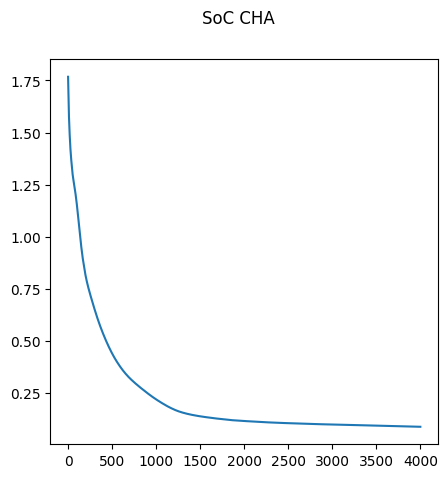

In [67]:
plt.figure(figsize=(5, 5))
plt.plot(history["Epoch"], history["Loss"], label='Loss')
plt.suptitle('SoC CHA')

In [68]:
# Save in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
# Save model
path = F'/content/gdrive/MyDrive/Colab Notebooks/model_cha_40deg_25_30_25_96pc.pt'
torch.save(model.state_dict(), path)

# Comprobando los modelos

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

path_dch = F'/content/gdrive/MyDrive/Colab Notebooks/model_dch_40deg_40_80_40_93pc.pt'
path_cha = F'/content/gdrive/MyDrive/Colab Notebooks/model_cha_40deg_25_30_25_96pc.pt'

model_dch = Model(n_inputs, 40, 80, 40, n_outputs)
model_dch.load_state_dict(torch.load(path_dch), strict=False)
model_dch.eval()

model_cha = Model(n_inputs, 25, 30, 25, n_outputs)
model_cha.load_state_dict(torch.load(path_cha), strict=False)
model_cha.eval()

T_s = 1.011272e+01
T_u = 2.119280e+01

I_s = 2.586432e+00
I_u = -1.286060e+00

U_s = 2.564308e-01
U_u = 3.745902e+00

data_dch_x = data_dch[["Voltage", "Current", "Temperature"]]
data_dch_y = data_dch["SoC_Percentage"].apply(discretize_soc)
data_cha_x = data_cha[["Voltage", "Current", "Temperature"]]
data_cha_y = data_cha["SoC_Percentage"].apply(discretize_soc)

scaler = StandardScaler()
data_dch_x = scaler.fit_transform(data_dch_x)
data_cha_x = scaler.fit_transform(data_cha_x)

capacity_estimate_cha = []
capacity_estimate_dch = []

x_cha = range(len(data_cha_x))

for data in data_cha_x:
  capacity_estimate_cha.append(model_cha.evaluate(torch.FloatTensor(data)) / 4.0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 0.98, 'SoC CHA Estimate')

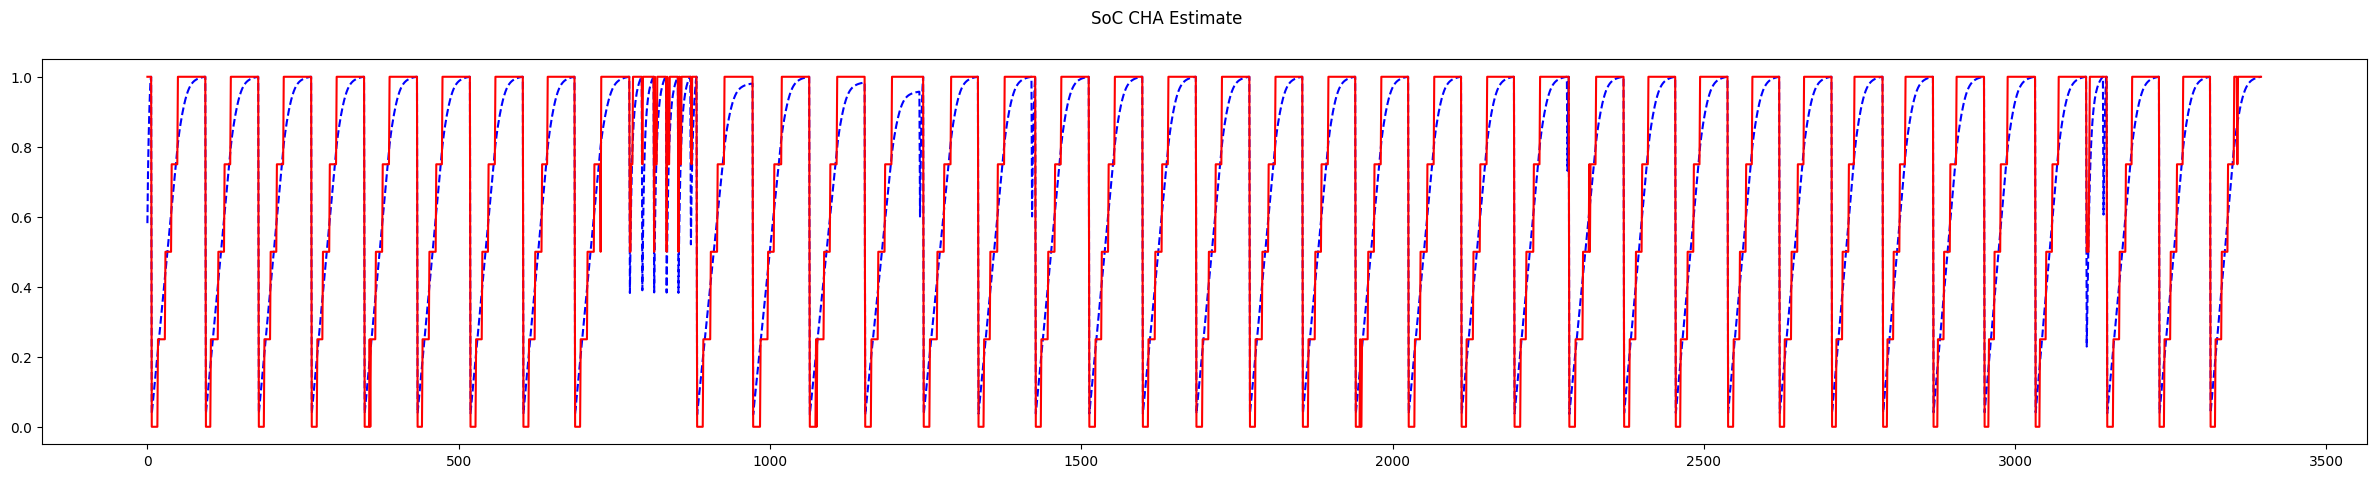

In [99]:
plt.figure(figsize=(30, 5))
plt.plot(x_cha, data_cha["SoC_Percentage"], 'b--', x_cha, capacity_estimate_cha, 'r')
plt.suptitle('SoC CHA Estimate')